# Домашнее задание к лекции "Визуализация данных"

## Обязательная часть

Вам необходимо провести базовый [EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis) выбранного набора данных. 

Требования к анализу:
- построить не менее 4 визуализаций различных видов;
- каждая визуализация должным образом оформлена и читается даже в отрыве от контекста; 
- по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

**Откуда брать данные?**

Можете взять свои рабочие данные, либо найти открытые данные (например, на [kaggle.com](https://www.kaggle.com/)) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком). Если идей нет, можете взять один из перечисленных ниже:
- [данные приложений из Google Play](https://www.kaggle.com/lava18/google-play-store-apps);
- [данные о видео из трендов YouTube](https://www.kaggle.com/datasnaek/youtube-new);
- [данные об уровне счастья в разных странах](https://www.kaggle.com/unsdsn/world-happiness).


### Дополнительная часть (необязательная)

* построить дополнительно не менее 2 визуализаций (итого не менее 6);
* в работе должны присутствовать следующие визуализации: boxplot, heatmap, scatter plot matrix;


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам
Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.

Был использован датасет [со статистическими данными](https://www.kaggle.com/augustlinnman/cholera-outbreak-stockholm-1853) по смертям от холеры в Швеции в 1853 году. 


In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
cholera = pd.read_csv("https://raw.githubusercontent.com/IlerioDef/educational_data/main/kolera-katarina-1853.csv")

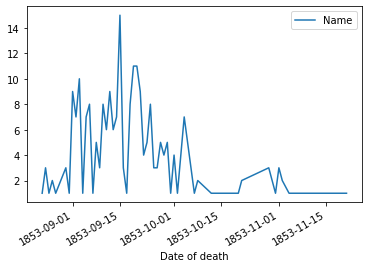

In [3]:
column_names = {
"Dödsdatum":"Date of death",
"Namn":"Name",
"Yrke":"Profession",
"Kön": "Sex",
"Ålder" : "Age",
"Församling" : "Data source",
"Arkivref" : "Archive ref",
"Sida" : "Page"} 
#Переименуем столбцы на английский манер. 
cholera.rename(columns=column_names, inplace = True)
#Изменим формат даты
cholera["Date of death"] = pd.to_datetime(cholera["Date of death"],format = "%Y-%m-%d")
# cholera.info()

#ГРАФИК 1 - посмотрим, сколько людей умирало в каждый из дней и есть ли какая-то зависимость
death_rate = cholera[["Date of death","Name"]].groupby("Date of death").count()
death_rate.plot()

#ГРАФИК Х - столбиковая диаграмма с разбивкам по возрастным и половым группам. 


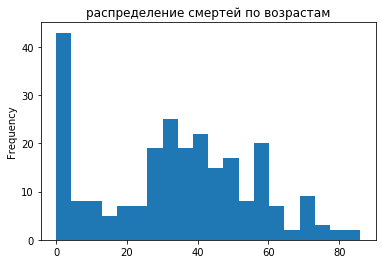

In [6]:
#ГРАФИК 2 - Гистограмма распределения по возрастам смерти.
cholera["Age"].plot(kind="hist", title="распределение смертей по возрастам", bins=20)
#Можно сделать вывод о том, что наибольшая смертность была среди младенцев и маленьких детей. 
#Учитывая период, можно предположить, что в тот период